</font><font color='Blue'><b>описание проекта</b></font><br>

в данном  рассмотрим данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.цель проекта: понять, на что потратить рекламный бюджет. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.columns = [x.lower() for x in data.columns]

In [6]:
data['name'] = data['name'].str.lower() 


In [7]:
data['genre'] = data['genre'].str.lower()


In [8]:
data['platform'] = data['platform'].str.lower()

In [10]:
data = data.drop_duplicates(subset=['platform', 'name'])

In [11]:
data.duplicated().sum()

0

In [12]:
data = data.astype({'year_of_release':'Int64'})

в столбце  Year_of_Release заменен тип данных на integer, так как год это целое число

In [13]:
data.isna().sum()

name                  1
platform              0
year_of_release     268
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = None

In [15]:
data= data.astype({'user_score':'float64'})

In [16]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16710 non-null  object 
 2   year_of_release  16442 non-null  Int64  
 3   genre            16709 non-null  object 
 4   na_sales         16710 non-null  float64
 5   eu_sales         16710 non-null  float64
 6   jp_sales         16710 non-null  float64
 7   other_sales      16710 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       7586 non-null   float64
 10  rating           9945 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [17]:
data['common_sales'] = data.na_sales + data.eu_sales + data.jp_sales + data.other_sales

In [18]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [20]:
data = data.dropna(subset=['name','genre','year_of_release'])

так как пропусков в столбце года образования около 1,5 процентов, то было принято решение удалить эти строки, так как они искажают результат некоторых исследований.Возможно, дубликаты появились из-за того, что продажи в одном из регионов выделилось в отдельную строку. В колонке rating значение tbd было заменено на Nan, так как это аналог пропуска

 ### Шаг 3. Проведение исследовательского анализа данных

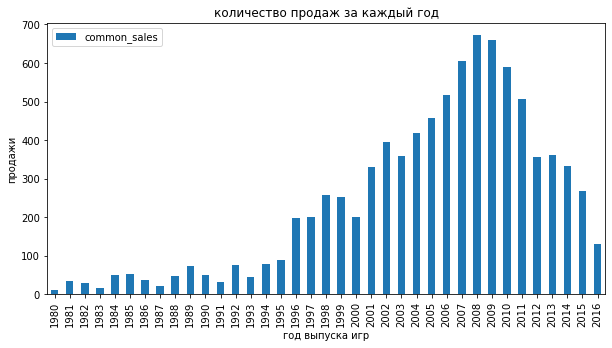

In [21]:
data.pivot_table(index='year_of_release', values='common_sales', aggfunc='sum').plot(kind='bar', figsize=(10,5))
plt.ylabel('продажи')
plt.xlabel('год выпуска игр')
plt.title('количество продаж за каждый год');

In [22]:
data.pivot_table(index='platform',values='common_sales').sort_values('common_sales',ascending=False).head(10)

,common_sales
platform,
gb,2.622990
nes,2.561735
gen,1.050000
snes,0.836987
ps4,0.801378
x360,0.779846
2600,0.745517
ps3,0.713663
wii,0.692986


''

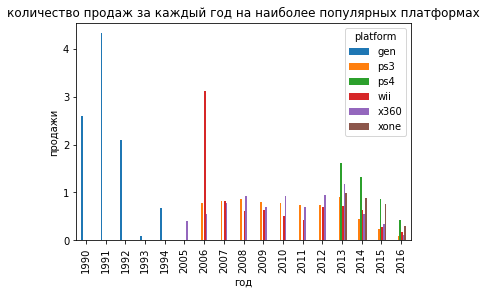

In [23]:
data.loc[(data.platform == 'ps4')|\
         (data.platform == 'gen')|\
         (data.platform == 'x360')|\
         (data.platform == 'ps3')|\
         (data.platform == 'xone')|\
         (data.platform == 'wii')]\
    .pivot_table(index='year_of_release',values='common_sales', columns='platform')\
    .sort_values('year_of_release').plot(kind='bar')
plt.title('количество продаж за каждый год на наиболее популярных платформах')
plt.xlabel('год')
plt.ylabel('продажи')
;
    



популярность платформы живет около 5 лет, поэтому будем считать актуальным период с 2013 года

In [24]:
data_2013 = data[data['year_of_release'] >= 2013]

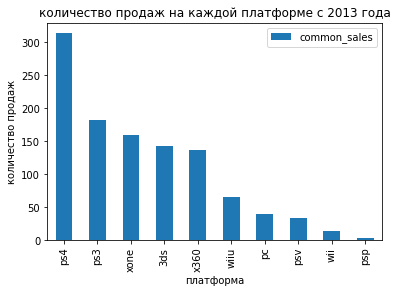

In [25]:
top10_platform = data_2013.pivot_table(index='platform', values='common_sales',aggfunc='sum').sort_values('common_sales', ascending=False).head(10).plot(kind='bar')
plt.title('количество продаж на каждой платформе с 2013 года')
plt.xlabel('платформа')
plt.ylabel('количество продаж');





лидируют по продажам платформы xbox one, ps4 и игровая консоль 3 ds

In [26]:
x360 = data_2013.loc[(data.platform=='x360'), 'year_of_release']
ps3 = data_2013.loc[(data.platform=='ps3'), 'year_of_release']
wii = data_2013.loc[(data.platform=='xone'), 'year_of_release']
ds = data_2013.loc[(data.platform=='3ds'), 'year_of_release']
ps4 = data_2013.loc[(data.platform=='ps4'), 'year_of_release']


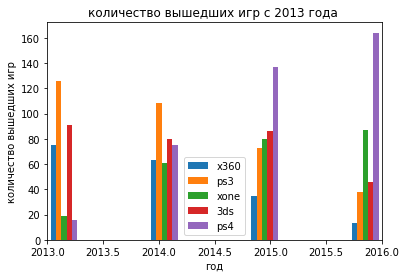

In [27]:
plt.hist((x360,ps3, wii, ds, ps4), label=['x360','ps3','xone','3ds','ps4'])
plt.xlim(2004)
plt.legend()
plt.title('количество вышедших игр с 2013 года ')
plt.xlabel('год')
plt.ylabel('количество вышедших игр')
plt.xlim(2013,2016)
plt.show()



платформа ps3  была наиболее папулярной в 2013 году, но затем количество вышедших игр снижается, после выхода ей на смену ps4 резко увеличивается количество игр на эту платформу 


далее рассмотрим продажи игр на каждой платформе 

In [28]:
boxplot_data = data_2013\
    .loc[(data.platform == '3ds')|\
         (data.platform == 'ps3')|\
         (data.platform == 'ps4')|\
         (data.platform == 'x360')|\
         (data.platform == 'xone')|\
         (data.platform == 'wiiu')|\
         (data.platform == 'pc')|\
         (data.platform == 'psv')|\
         (data.platform == 'psp')|\
         (data.platform == 'wii')]

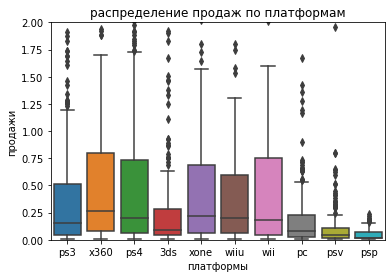

In [30]:
sns.boxplot(x='platform',y='common_sales',data=boxplot_data)
plt.ylim(0,2)
plt.title('распределение продаж по платформам')
plt.ylabel('продажи')
plt.xlabel('платформы');


самые высокие средние продажи на платформе ps4, самые низкие на 3 ds

#### выявление зависимостей отзывов на продажи

In [31]:
data_2013.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,common_sales
year_of_release,1.000000,-0.124551,-0.087983,-0.074142,-0.090225,0.064322,0.039318,-0.117878
na_sales,-0.124551,1.000000,0.769995,0.264513,0.817367,0.301130,-0.020010,0.922617
eu_sales,-0.087983,0.769995,1.000000,0.244616,0.934796,0.280785,-0.027040,0.928031
jp_sales,-0.074142,0.264513,0.244616,1.000000,0.195192,0.134143,0.194025,0.434394
other_sales,-0.090225,0.817367,0.934796,0.195192,1.000000,0.275289,-0.011500,0.921370
critic_score,0.064322,0.301130,0.280785,0.134143,0.275289,1.000000,0.502221,0.313700
user_score,0.039318,-0.020010,-0.027040,0.194025,-0.011500,0.502221,1.000000,-0.002608
common_sales,-0.117878,0.922617,0.928031,0.434394,0.921370,0.313700,-0.002608,1.000000


корреляция между продажами и оценкой критиков 0.32

Расчет по Платформе 3ds


user_score      0.241504
common_sales    1.000000
Name: common_sales, dtype: float64

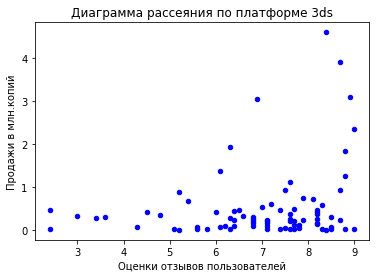

critic_score    0.357057
common_sales    1.000000
Name: common_sales, dtype: float64

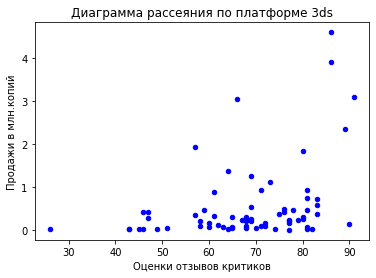

Расчет по Платформе ds
Для платформы ds не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы ds не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе pc


user_score     -0.093842
common_sales    1.000000
Name: common_sales, dtype: float64

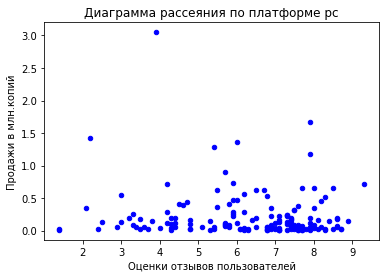

critic_score    0.19603
common_sales    1.00000
Name: common_sales, dtype: float64

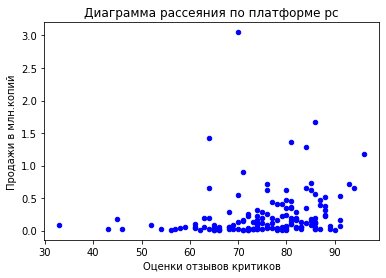

Расчет по Платформе ps3


user_score      0.002394
common_sales    1.000000
Name: common_sales, dtype: float64

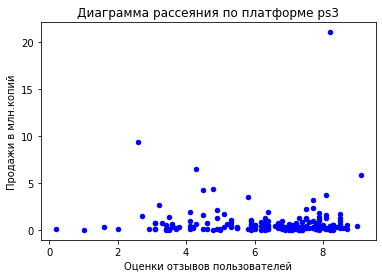

critic_score    0.334285
common_sales    1.000000
Name: common_sales, dtype: float64

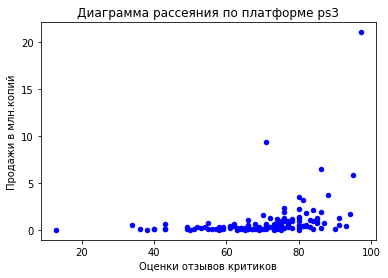

Расчет по Платформе ps4


user_score     -0.031957
common_sales    1.000000
Name: common_sales, dtype: float64

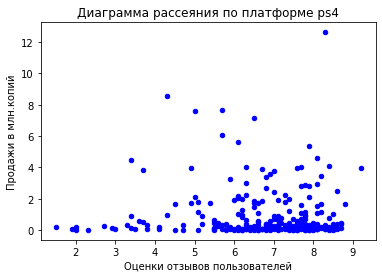

critic_score    0.406568
common_sales    1.000000
Name: common_sales, dtype: float64

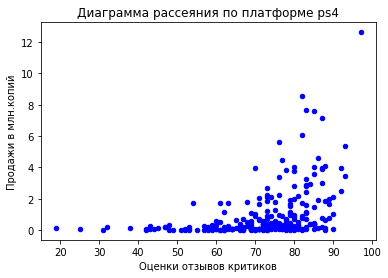

Расчет по Платформе psp
Для платформы psp не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы psp не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе psv


user_score      0.000942
common_sales    1.000000
Name: common_sales, dtype: float64

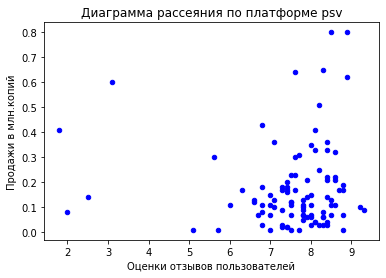

critic_score    0.254742
common_sales    1.000000
Name: common_sales, dtype: float64

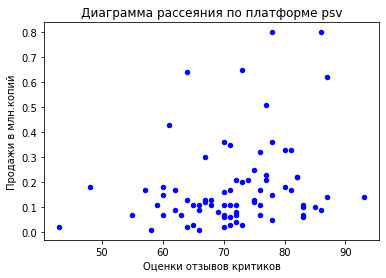

Расчет по Платформе wii


user_score      0.682942
common_sales    1.000000
Name: common_sales, dtype: float64

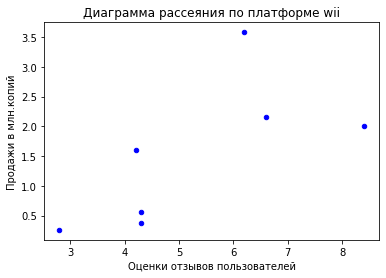

Для платформы wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе wiiu


user_score      0.41933
common_sales    1.00000
Name: common_sales, dtype: float64

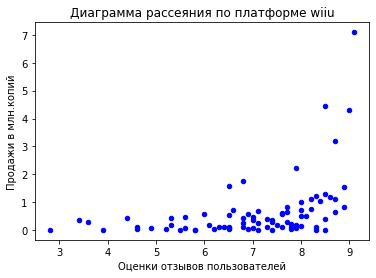

critic_score    0.376415
common_sales    1.000000
Name: common_sales, dtype: float64

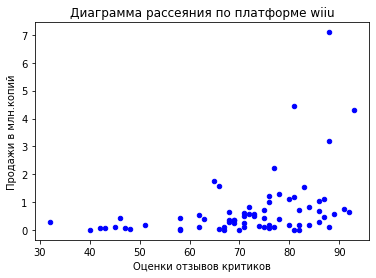

Расчет по Платформе x360


user_score     -0.011742
common_sales    1.000000
Name: common_sales, dtype: float64

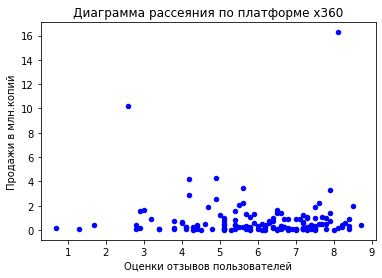

critic_score    0.350345
common_sales    1.000000
Name: common_sales, dtype: float64

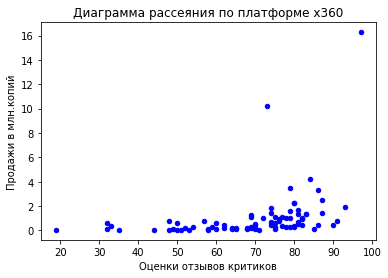

Расчет по Платформе xone


user_score     -0.068925
common_sales    1.000000
Name: common_sales, dtype: float64

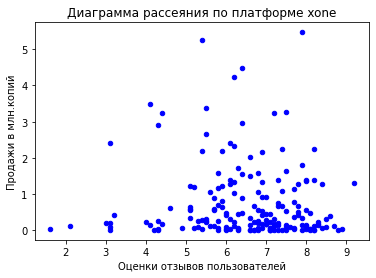

critic_score    0.416998
common_sales    1.000000
Name: common_sales, dtype: float64

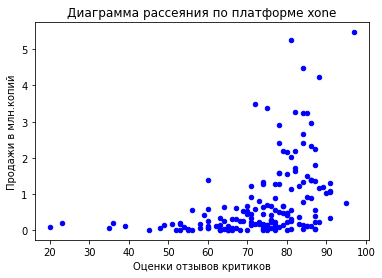

In [76]:
import matplotlib.pyplot as plt
df_sc, y = data_2013.copy(), 'common_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[games_on_pl['user_score'].notna() == True])
    not_critic = len(games_on_pl[games_on_pl['critic_score'].notna() == True])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl.plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl.plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

платформы ps3, x360, 3ds  в актульном периоде имеют немного продаж, поэтому определить зависимость между оценкой и продажами не получится, а платформы ps4 xone имеют экспоненциальную зависимость

 #### общее распределение игр по жанрам

In [48]:
data_2013.pivot_table(index='genre', aggfunc='median').sort_values('common_sales', ascending=False)

,common_sales,critic_score,eu_sales,jp_sales,na_sales,other_sales,user_score,year_of_release
genre,,,,,,,,
shooter,0.450,76.0,0.190,0.00,0.200,0.050,6.55,2014.0
sports,0.240,77.0,0.050,0.00,0.080,0.020,5.50,2014.5
platform,0.225,77.0,0.080,0.00,0.090,0.025,7.10,2014.0
role-playing,0.125,74.0,0.010,0.05,0.020,0.010,7.60,2014.0
fighting,0.125,72.0,0.020,0.03,0.045,0.010,7.50,2014.0
racing,0.120,74.0,0.060,0.00,0.030,0.010,6.20,2014.0
action,0.110,73.0,0.020,0.01,0.020,0.010,7.10,2015.0
simulation,0.100,69.5,0.035,0.00,0.000,0.005,6.80,2015.0
misc,0.100,75.0,0.010,0.02,0.010,0.000,7.00,2014.0


в жанрах шутеры и спортивные продажи самые высокие, самые низкие-приключенческий жанр и пазлы.

### Шаг 4. Составьте портрет пользователя каждого региона

In [49]:
data_2013.pivot_table(index='platform', values=['na_sales','jp_sales', 'eu_sales','common_sales']).sort_values('common_sales', ascending=False).head(5)


,common_sales,eu_sales,jp_sales,na_sales
platform,,,,
ps4,0.801378,0.359923,0.040714,0.277398
x360,0.735484,0.228602,0.002742,0.439032
xone,0.645020,0.208866,0.001377,0.377004
wii,0.593913,0.257826,0.002174,0.285217
wiiu,0.562000,0.172609,0.094609,0.254000


In [50]:
na_platform = data_2013.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)


In [51]:
na_platform_top5 = na_platform[:5]

na_platform_top5_2 = na_platform[5:]
na_platform_top5_2 = pd.DataFrame([na_platform_top5_2.sum()], index=["Other"])
na_platform_totals = na_platform_top5.append(na_platform_top5_2)

In [52]:
jp_platform = data_2013.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)

In [53]:
jp_platform_top5 = jp_platform[:5]

jp_platform_top5_2 = jp_platform[5:]
jp_platform_top5_2 = pd.DataFrame([jp_platform_top5_2.sum()], index=["Other"])
jp_platform_totals = jp_platform_top5.append(jp_platform_top5_2)

In [54]:
eu_platform = data_2013.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)


In [55]:
eu_platform_top5 = eu_platform[:5]

eu_platform_top5_2 = eu_platform[5:]
eu_platform_top5_2 = pd.DataFrame([eu_platform_top5_2.sum()], index=["Other"])
eu_platform_totals = eu_platform_top5.append(eu_platform_top5_2)

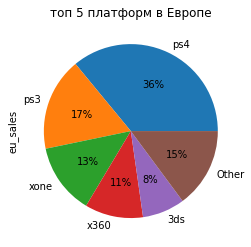

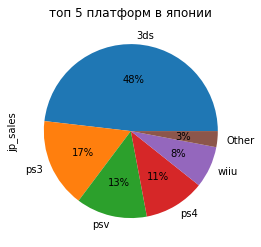

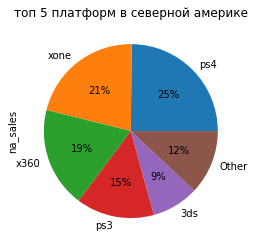

In [56]:
eu_platform_totals.plot('platform','eu_sales',kind='pie', autopct='%1.0f%%', legend=False, title='топ 5 платформ в Европе')

jp_platform_totals.plot('platform','jp_sales',kind='pie', autopct='%1.0f%%', legend=False, title='топ 5 платформ в японии')

na_platform_totals.plot('platform','na_sales',kind='pie', autopct='%1.0f%%', legend=False, title='топ 5 платформ в северной америке')

plt.show()


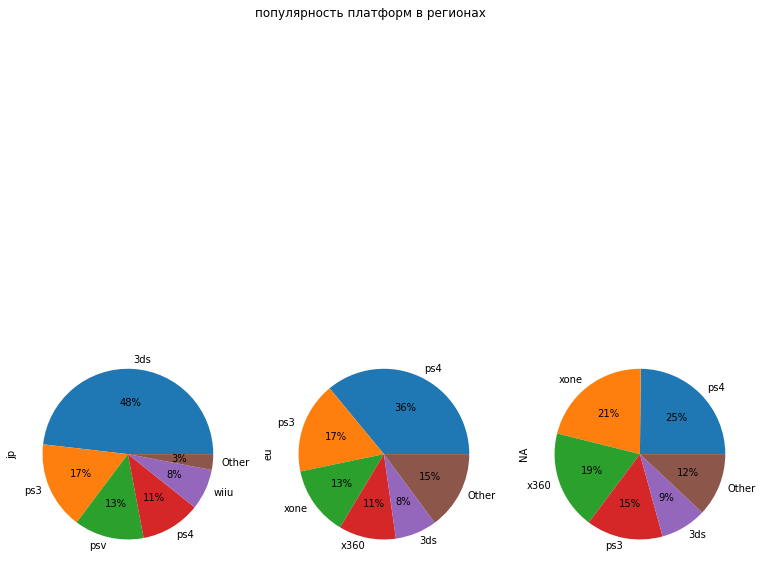

In [57]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (13,13));

jp_platform_totals.plot(
    kind='pie',
    title = 'популярность платформ в регионах ',
    ylabel = 'jp',
    autopct='%1.0f%%',
    legend=False,
    ax = axes[0],
    subplots=True );

eu_platform_totals.plot(
    kind='pie',
    ylabel = 'eu',
    autopct='%1.0f%%',
    legend=False,
    ax = axes[1],
    subplots=True);

na_platform_totals.plot(
    kind='pie',
    title = 'популярность платформ в регионах ',
    ylabel = 'NA',
    autopct='%1.0f%%',
    legend=False,
    ax = axes[2],
    subplots=True);
plt.show()

самая популярная платформа в Японии 3ds, она занимает почти половину всех вышедших игр.В европе и северно америке -PS4

In [58]:
na_genre = data_2013.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_top5 = na_genre[:5]

na_genre_top5_2 = na_genre[5:]
na_genre_top5_2 = pd.DataFrame([na_genre_top5_2.sum()], index=["Other"])
na_genre_totals = na_genre_top5.append(na_genre_top5_2)

In [59]:
jp_genre = data_2013.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre_top5 = jp_genre[:5]

jp_genre_top5_2 = jp_genre[5:]
jp_genre_top5_2 = pd.DataFrame([jp_genre_top5_2.sum()], index=["Other"])
jp_genre_totals = jp_genre_top5.append(jp_genre_top5_2)

In [60]:
eu_genre = data_2013.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_top5 = eu_genre[:5]

eu_genre_top5_2 = eu_genre[5:]
eu_genre_top5_2 = pd.DataFrame([eu_genre_top5_2.sum()], index=["Other"])
eu_genre_totals = eu_genre_top5.append(eu_genre_top5_2)

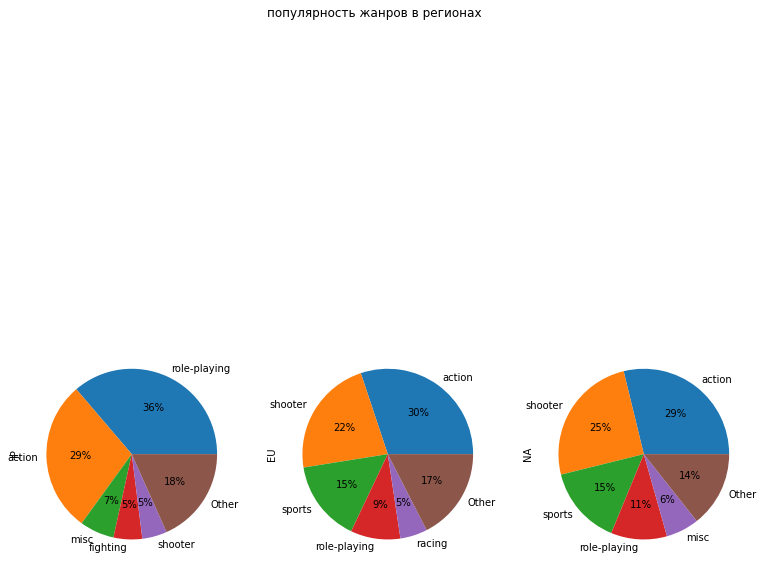

In [61]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (13,13));

jp_genre_totals.plot(
    kind='pie',
    title = 'популярность платформ в регионах ',
    ylabel = 'JP',
    autopct='%1.0f%%',
    legend=False,
    ax = axes[0],
    subplots=True );

eu_genre_totals.plot(
    kind='pie',
    ylabel = 'EU',
    autopct='%1.0f%%',
    legend=False,
    ax = axes[1],
    subplots=True);

na_genre_totals.plot(
    kind='pie',
    title = 'популярность жанров в регионах ',
    ylabel = 'NA',
    autopct='%1.0f%%',
    legend=False,
    ax = axes[2],
    subplots=True);
plt.show()

в японии предпочитают ролевые игры. в европе-экшн, а северной америке-шутеры

In [62]:
data_2013.rating =  data_2013.rating.fillna('no rating')

In [63]:
data_2013.pivot_table(index='rating',values=['eu_sales', 'jp_sales','na_sales','common_sales'], aggfunc='sum')\
            .sort_values('common_sales', ascending=False)

,common_sales,eu_sales,jp_sales,na_sales
rating,,,,
M,371.68,145.32,14.11,165.21
no rating,276.84,78.91,85.05,89.42
E,200.16,83.36,15.14,79.05
T,126.62,41.95,20.59,49.79
E10+,115.39,42.69,5.89,54.24


In [64]:
data_2013.rating.unique()

array(['M', 'no rating', 'E', 'T', 'E10+'], dtype=object)

самые высокие суммарные продажи у игр для лиц старше 17 лет, самые низкие-для лиц старше 10 лет

### Шаг 5. Проверьте гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC различны

In [66]:
Xone_PC_user_score = data_2013.loc[(data.platform == 'xone') | (data.platform == 'pc')]\
                                .groupby('platform').agg({'user_score':'mean'})

In [67]:
Xone_PC_user_score 

,user_score
platform,
pc,6.269677
xone,6.521429


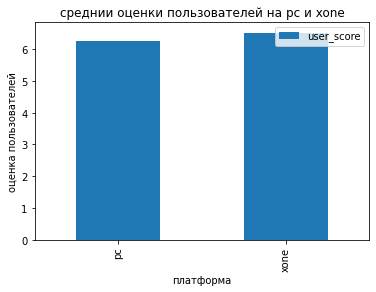

In [68]:
Xone_PC_user_score.plot(kind='bar')
plt.xlabel('платформа')
plt.ylabel('оценка пользователей')
plt.title('среднии оценки пользователей на pc и xone');

In [69]:
xone = data_2013[data.platform == 'xone'].user_score.dropna().reset_index(drop=True)
pc = data_2013[data.platform == 'pc'].user_score.dropna().reset_index(drop=True)

In [70]:
results = st.ttest_ind(xone, pc )
print('p-значение:', results.pvalue)
alpha = 0.01

p-значение: 0.14012658403611647


In [71]:
if results.pvalue < alpha:
    
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


вывод: Средние пользовательские рейтинги платформ Xbox One и PC различны. значение p-value оказалось меньше 1% уровня значимости.Следовательно, нулевая гипотеза отвергнута 

H0: Среднее пользовательского рейтинга жанрв Action равно среднему пользовательского рейтинга жанрв  Sports 

H1: Среднее пользовательского рейтинга жанрв Action не равно среднему пользовательского рейтинга жанрв  Sports 

In [72]:
action_score = data_2013[data.genre == 'action'].user_score.dropna()

In [73]:
sports_score = data_2013[data.genre == 'sports'].user_score.dropna()

In [74]:
results = st.ttest_ind(action_score, sports_score )
print('p-значение:', results.pvalue)
alpha = 0.05

p-значение: 1.0517832389140023e-27


In [75]:
if results.pvalue < alpha:
    
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


вывод:Средние пользовательские рейтинги жанров Action  и  Sports разные, значение p-value оказалось выше 5% уровня значимости  

были проведены тесты о равенстве средних двух генеральных совокупностей.

необходимо было провести двусторонний t-тест, формулировкой нулевой гипотезы стало выражение о равенсте двух средних значений генераальной совокупности, альтернативная гипотеза-обратная нулевой

### Шаг 6. Напишите общий вывод

В работе были рассмотрены данные по выпуску игр на различные платформы.

Были заменены названия столбцов, посчитаны суммарные продажи, пострено распределение по годам,на основе которого выбран актульный период,в этом периоде были рассмотрены продажи на популярные платформы, рассмотрены зависимости отзывов критиков на продажи, рассмотрено количество продаж в зависимости от жанров, рассмотрены самые популярные платформы и жанры в кажом регионе,были проверены две гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC и средних пользовательских рейтингов жанров Action и Sports.



наибольшее количество игр было выпущено в 2010 году, затем их количество начало уменьшаться.Популярность платформы живет около 5 лет, поэтому будем считать актуальным период с 2013 года. Лидируют по продажам платформы xbox one, ps4 и игровая консоль 3ds. Платформа ps3 была наиболее папулярной в 2013 году, но затем количество вышедших игр снижается, после выхода ей на смену ps4 резко увеличивается количество игр на эту платформу. Самые высокие средние продажи на платформе ps4, самые низкие на 3ds. В жанрах шутеры и спортивные продажи самые высокие, самые низкие-приключенческий жанр и пазлы. Самая популярная платформа в Японии 3ds, она занимает почти половину всех вышедших игр.В европе и северно америке -PS4. В японии предпочитают ролевые игры, в европе-экшн, а северной америке-шутеры.Самые высокие суммарные продажи у игр для лиц старше 17 лет, самые низкие-для лиц старше 10 лет

вывод: наиболее целеосознанно вкладывать рекламный бюджет в игры в европе и северной америке на платформе ps4 в жанре шутеры и экшн для игр, предназначенных для лиц старше 17 лет